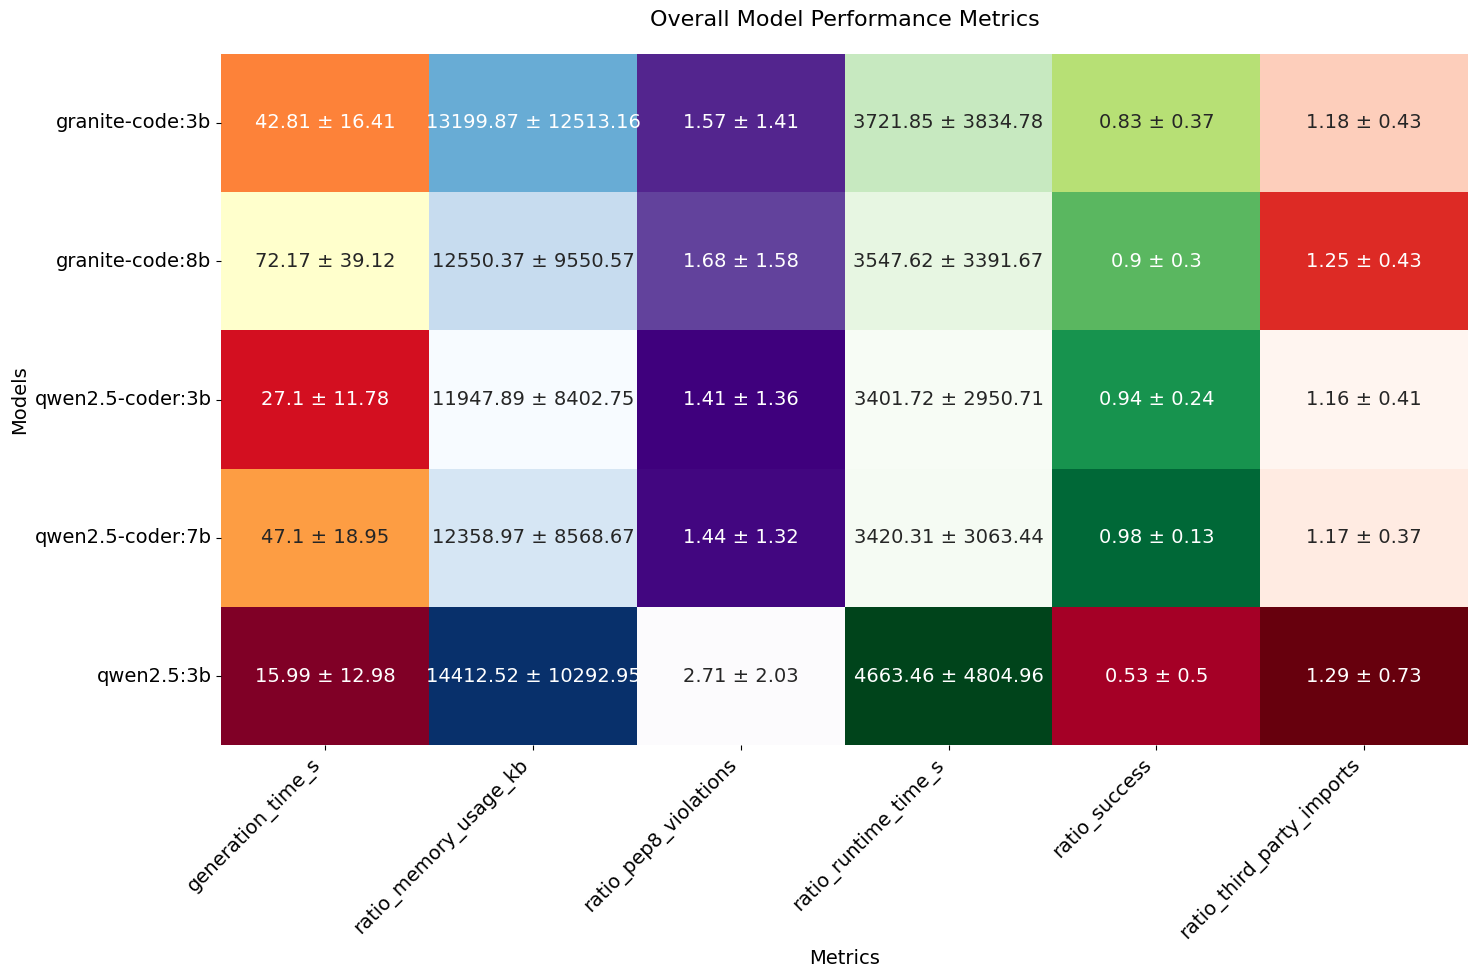

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('benchmark_metrics.csv')

# Keep only the individual runs (drop any 'avg' row)
df = df[df['run_ix'] != 'avg']

# ─── REPLACE large sentinel‐values with 0 ────────────────────────────────────
df.loc[df['ratio_third_party_imports'] > 10, 'ratio_third_party_imports'] = 0

# List of metrics to aggregate
metrics = [
    'generation_time_s',
    'ratio_memory_usage_kb',
    'ratio_pep8_violations',
    'ratio_runtime_time_s',
    'ratio_success',
    'ratio_third_party_imports'
]

# Group by model and compute mean and standard deviation
grouped = df.groupby('model')[metrics]
pivot_mean = grouped.mean()
pivot_std = grouped.std()

# Use the means for coloring; annotate as "mean ± std"
pivot_overall = pivot_mean.copy()
annot_df = (
    pivot_mean.round(2).astype(str)
    + " ± "
    + pivot_std.round(2).astype(str)
)

# Set up figure
fig, ax = plt.subplots(figsize=(15, 10))

# Define individual colormaps for each metric
colormaps = {
    'generation_time_s': 'YlOrRd_r',
    'ratio_memory_usage_kb': 'Blues',
    'ratio_pep8_violations': 'Purples_r',
    'ratio_runtime_time_s': 'Greens',
    'ratio_success': 'RdYlGn',
    'ratio_third_party_imports': 'Reds'
}

# Create a mask to plot one column at a time
mask = np.zeros_like(pivot_overall, dtype=bool)

# Plot each column with its own colormap, annotating with "mean ± std"
for i, column in enumerate(pivot_overall.columns):
    mask[:] = True
    mask[:, i] = False  # Only show current column

    sns.heatmap(
        pivot_overall,
        annot=annot_df,
        fmt='',
        cmap=colormaps[column],
        mask=mask,
        ax=ax,
        cbar=False,
        annot_kws={'size': 14}
    )

plt.rcParams.update({'font.size': 14})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=14)
ax.set_title('Overall Model Performance Metrics', pad=20, fontsize=16)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Models', fontsize=14)

plt.tight_layout()
plt.savefig("model_metrics_overall_heatmap_with_std.png", dpi=300, bbox_inches='tight')
plt.show()


In [17]:
# df['ratio_third_party_imports'].hist()

In [18]:
# Keep only the individual runs (drop any 'avg' row)
df = df[df['run_ix'] != 'avg']

# Group by task and model to compute mean and standard deviation of ratio_success
grouped = df.groupby(['task', 'model'])['ratio_success']
pivot_mean = grouped.mean().unstack()
pivot_std = grouped.std().unstack()

# Build an annotation DataFrame of the form "mean ± std"
annot_df = (
    pivot_mean.round(2).astype(str)
    + " ± "
    + pivot_std.round(2).astype(str)
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_mean,
    annot=annot_df,
    fmt='',
    cmap="YlGnBu",
    cbar_kws={"label": "Success Ratio"}
)
plt.title("Success Ratio per Task and Model (mean ± std)", pad=12, fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Task", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("success_by_task_model_with_std.png", dpi=300)
plt.close()